<a href="https://colab.research.google.com/github/Prasadslaxmi08/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Data set and reading it
import pandas as pd
df= pd.read_csv('/content/datasetIMDB.csv')
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df = df.dropna() # drops the null cloumns if there are any

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].value_counts() # returns a Series that contain counts of unique values

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: >

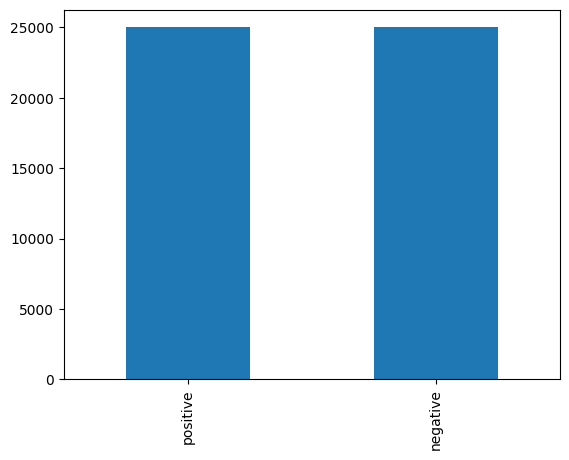

In [ ]:
df['sentiment'].value_counts().plot(kind = 'bar') # Visualisation

In [ ]:
# Dividing the dataset into input and output
#input - selects all rows and the first column of a DataFrame and stores the result as a NumPy array in the variable x
x = df.iloc[:,0].values
#output - selects all rows and the second column of a DataFrame and stores the result as a NumPy array in the variable y
y = df.iloc[:,1].values
print(x)
print(y)

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

##### imports the train_test_split function from the sklearn.model_selection module and uses it to split the data into training and testing sets.

##### The train_test_split function takes in two arrays, x and y, and returns four arrays, x_train, x_test, y_train, and y_test, which are used to train and test a machine learning model.The random_state parameter is used to ensure that the same random splits are generated each time the code is run

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

#####  Importing the TfidfVectorizer function from the sklearn.feature_extraction.text module and uses it to convert text data into a matrix of TF-IDF features. The fit_transform method is used to fit the vectorizer on the training data and transform it into a matrix of TF-IDF features, which is stored in the variable x_train_v. The transform method is used to transform the test data into a matrix of TF-IDF features, which is stored in the variable x_test_v.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v=vect.transform(x_test)

##### Importing the SVC class from the sklearn.svm module and creates an instance of the SVC classifier.
###### SVC stands for Support Vector Classifier, which is a supervised machine learning algorithm used for classification tasks. The SVC algorithm works by mapping data points to a high-dimensional space and finding the optimal hyperplane that separates the data into different classes .The SVC class provides various parameters that can be adjusted to customize the behavior of the classifier, such as the kernel type, regularization parameter, and decision function shape. By default, the SVC classifier uses a radial basis function (RBF) kernel and other default parameter values.

In [ ]:
from sklearn.svm import SVC
model = SVC()

##### Why only SVC model ?
##### High accuracy, Robustness to noise, Flexibility, Scalability, Generalization

In [ ]:
model.fit(x_train_v,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_v)
y_pred#predicted values

array(['positive', 'negative', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
y_test

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

89.816

In [ ]:
#pipelining
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
y_pred1 = text_model.predict(x_test)
y_pred1

array(['positive', 'negative', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
y_test

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)*100

89.816

In [ ]:
import joblib
joblib.dump(text_model,'SentimentAnalysis')

['SentimentAnalysis']